# edwith_2.2 pandas cheatsheet

패널 데이터 시스템

대용량 데이터를 빠르게 처리할 수 있고, 기존의 소스코드를 재사용(월별,주별로 작성되는 작업들)가능

교재: 10 minutes to pandas, pandas cheat sheet

In [1]:
import pandas as pd

In [27]:
# pd.DataFrame? 또는 pd.DataFrame(shift+alt_tab)으로 도움말 불러올수있음

# 데이터프레임 : 2차원(행렬) 자료구조
df = pd.DataFrame(
{"a" : [4, 5, 6, 4],
"b" : [7, 8, 9, 9],
"c" : [10, 11, 12, 19]},
index = [1, 2, 3, 4])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,9,19


In [13]:
# 시리즈 데이터 : 1차원(벡터) 자료구조
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [15]:
df[["a"]] # 시리즈-> 데이터프레임의 형태로 바뀜

,a
1,4
2,5
3,6


### Subset(일부값만 불러오기)

In [19]:
# 행 기준으로 일부값 불러오기
df["a"] > 4

1    False
2     True
3     True
Name: a, dtype: bool

In [21]:
df[df["a"] > 4] 

,a,b,c
2,5,8,11
3,6,9,12


In [24]:
# df["a","b"] >> error
# 두개 이상의 값을 불러올 때는 DataFrame 형태로 불러와야 함
df[["a", "b"]] 

,a,b
1,4,7
2,5,8
3,6,9


### Summarize Data

In [29]:
# 카테고리별 값의 빈도수를 구하기
df["a"].value_counts()

4    2
6    1
5    1
Name: a, dtype: int64

In [31]:
len(df)

4

### Reshaping Data

In [39]:
df["a"].sort_values() # a 컬럼을 정렬

1    4
4    4
2    5
3    6
Name: a, dtype: int64

In [41]:
df.sort_values("a") # 전체 dataframe을 a 컬럼을 기준으로 정렬

,a,b,c
1,4,7,10
4,4,9,19
2,5,8,11
3,6,9,12


In [42]:
df.sort_values("a", ascending=False) # 전체 dataframe을 a 컬럼을 기준으로 정렬, 내림차순으로

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10
4,4,9,19


In [43]:
# c 컬럼을 drop, 컬럼이기때문에 axis는 1로(axis=1이 default)
df.drop(["c"], axis=1)

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


In [50]:
# drop도 변수에 담아줘야만 삭제가 반영됨??? < 굳이 안담아줘도 반영됨
df

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


### Group data

In [51]:
# a 값을 기준으로 해서 b값의 평균을 구함
df.groupby(["a"])["b"].mean()

a
4    8
5    8
6    9
Name: b, dtype: int64

In [54]:
df.groupby(["a"])["b"].agg(["mean", "sum", "count"])

,mean,sum,count
a,,,
4,8,16,2
5,8,8,1
6,9,9,1


In [55]:
df.groupby(["a"])["b"].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,2.0,8.0,1.414214,7.0,7.5,8.0,8.5,9.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [57]:
df

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


In [58]:
# pivoting : 그룹화해서 연산
pd.pivot_table(df, index="a")

,b
a,
4,8
5,8
6,9


In [59]:
pd.pivot_table(df, index="a", values="b", aggfunc="sum")

,b
a,
4,16
5,8
6,9


### Plotting : 그래프를 그리는 것

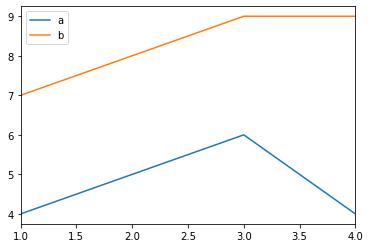

In [62]:
df.plot()

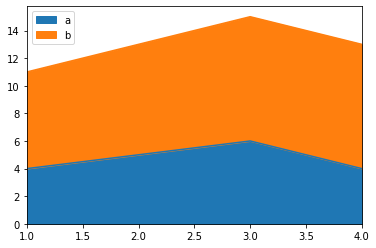

In [64]:
df.plot.area()

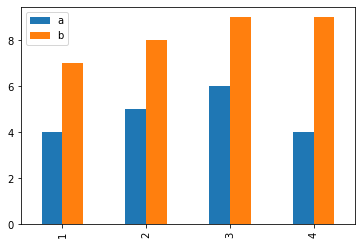

In [65]:
df.plot.bar()